* * *

## Eigenstates of a square well potential and their energies | Fourier transform | Electric field created by two opposites charges

* * *

**Ejercicio 1: Energías de auto-estados de en un pozo de potencial cuadrado.**

Considerese un pozo de potencial cuadrado como el de la figura, de ancho $w$, con bordes laterales de altura $V$:


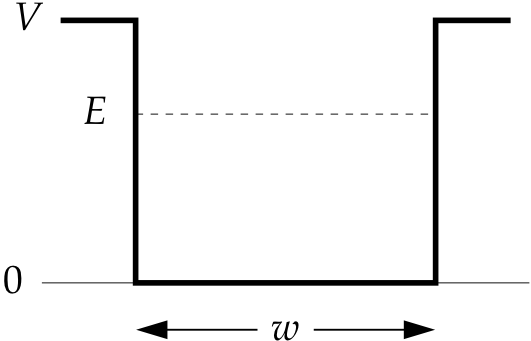

In [6]:
from IPython.display import display, Image
Image(filename='smallwell.png'
      ,width=200,height=200)

Usando la ecuación de Schroedinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son las soluciones de las ecuaciones:

$$\tan\sqrt{w^2 m E /(2 \hbar^2)} = 
\begin{cases}
\sqrt{(V - E)/E} & {\rm para \ los \ estados \ pares,} \\
-\sqrt{E/(V - E)} & {\rm para \ los \ estados \ impares,} 
\end{cases}
$$

donde los estados se numeran empezando desde $0$, el estado fundamental es el estado $0$, el primer excitado el $1$,...

1. Para un electrón (masa $9.1094 \times 10^{-31}$ kg) en un pozo con $V = 20$ eV y $w = 1 nm$. Escribir un programa para pintar las tres funciones:

$$\begin{eqnarray}
y_1 & = & \tan\sqrt{\frac{w^2 m E}{2 \hbar^2}} \\
y_2 & = & \sqrt{\frac{V - E}{E}} \\
y_3 & = & -\sqrt{\frac{E}{V - E}}
\end{eqnarray}$$

en una misma gráfica, como función de $E$ desde $E = 0$ hasta $E = 20 eV$. De lo visto en la gráfica realizar una estimación de las energías de los seis primeros niveles de energía de la partícula.

2. Escribir un segundo programa para calcular los valores de los primeros seis niveles de energía en electron-voltios con una precisión de $0.001 eV$ usando una busqueda binaria.

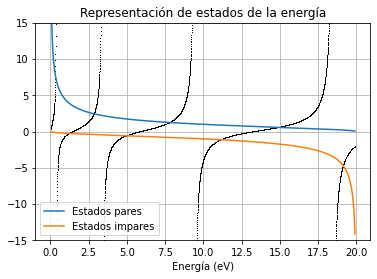

La energía del nivel n=0 es  0.31757812499999993 eV
La energía del nivel n=1 es  1.27001953125 eV
La energía del nivel n=2 es  2.85076904296875 eV
La energía del nivel n=3 es  5.0499267578125 eV
La energía del nivel n=4 es  7.84979248046875 eV
La energía del nivel n=5 es  11.21435546875 eV


In [7]:
from numpy import linspace, tan, sqrt, pi
from pylab import plot, show, ylim, legend, grid, xlim, title, xlabel
E=linspace(0.01,19.9,5000) #en eV
V=20 #en eV
w=1e-9 #en m
hbarra=6.626e-34/(2*pi) #en J·s
m=9.1094e-31 #en kg
e=1.6022e-19 #en Culombios
y1=tan(sqrt(w**2*m*E*e/(2*hbarra**2)))
y2=sqrt((V-E)/E) #estados pares
y3=-sqrt(E/(V-E)) #estados impares
#pinto las funciones 
plot(E,y1, "k,")
plot(E,y2, label='Estados pares')
plot(E,y3, label='Estados impares')
xlabel("Energía (eV)")
title("Representación de estados de la energía")
ylim(-15,15)
grid()
legend()
show()
def biseccionpar(x1,x2): #defino una función que calcule las raices por el método de bisección para estados pares
    def f(x):
        return tan(sqrt(w**2*m*x*e/(2*hbarra**2)))-sqrt((V-x)/x)
    precision=1e-3 #error pedido
    while abs(x1-x2)>precision: #inicio método de bisección
        xn=0.5*(x1+x2)
        if f(xn)*f(x1)>0:
            x1=xn
        else:
            x2=xn
    x=0.5*(x1+x2)
    return x
def biseccionimpar(x1,x2): #defino una función que calcule las raices por el método de bisección para estados impares
    def f(x):
        return tan(sqrt(w**2*m*x*e/(2*hbarra**2)))+sqrt(x/(V-x))
    precision=1e-3   
    while abs(x1-x2)>precision: #inicio método de bisección
        xn=0.5*(x1+x2)
        if f(xn)*f(x1)>0:
            x1=xn
        else:
            x2=xn
    x=0.5*(x1+x2)
    return x

#para estimar el intervalo en el que hacer la bisección, se mira la gráfica para seleccionar un punto en el que la función sea
#negativa y otro en el que sea positiva
print("La energía del nivel n=0 es ", biseccionpar(0.3,0.35),"eV") #par n=0
print("La energía del nivel n=1 es ", biseccionimpar(0.5,2.5),"eV") #impar n=1
print("La energía del nivel n=2 es ", biseccionpar(0.5,3),"eV") #par n=2
print("La energía del nivel n=3 es ", biseccionimpar(4,7),"eV") #impar n=3
print("La energía del nivel n=4 es ", biseccionpar(4,9),"eV") #par n=4
print("La energía del nivel n=5 es ", biseccionimpar(10,14),"eV") #impar n=5

De la gráfica obtenida, también se pueden estimar las energías, aunque de forma mucho menos precisa:
E=0.3 eV (para n=0); 
E=1.3 eV (para n=1); 
E=2.8 eV (para n=2); 
E=5 eV (para n=3); 
E=7.8 eV (para n=4); 
E=11 eV (para n=5)

**Ejercicio 2. : Suavizado de funciones y transformada de Fourier.**

Sea una función $f(t)$ que representa una onda cuadrada con aplitud $1$ y frecuencia $1$ Hz.

$$f(t) = \begin{cases}
1 & {\rm if} \ 0 < x < \frac{1}{2} \\
-1 & {\rm if} \ \frac{1}{2} \leq x < 1
\end{cases}$$

1. Intente suavizar la función usando una transfromada de Fourier
    * Escribir un programa que cree un array de $N = 1000$ elementos conteniendo $1000$ muestras igualmente espaciadas en un ciclo.
    
2. Calcule la transformada de Fourier discreta del array.

3. Hacer cero todos los coeficientes menos los diez primeros e invertir la transformada de Fourier para obtener la señal suavizada.

4. Hacer una gráfica que muestre los resultados. 

5. Explique los resultados obtenidos.

6. Como otro ejemplo de suavización de funciones, importar los datos del fichero pitch.txt y utilizando la tranformada de Fourier y su inversa suavizar la función variando el número de coeficientes de Fourier que se hacen cero. Explique los resultados obtenidos.


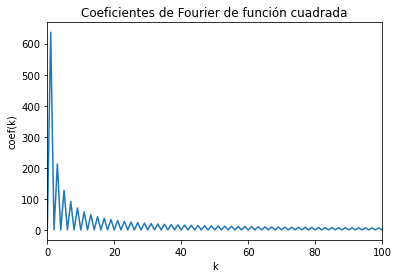

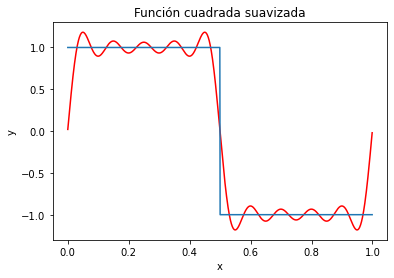

In [8]:
from numpy import arange, loadtxt
from numpy.fft import rfft, irfft
from pylab import plot, show, xlim, ylim, title, xlabel, ylabel,legend
def f(x): #defino la onda cuadrada
    if x<0.5:
        return 1
    else:
        return -1
N=1000
x=arange(0,1,1/N) #vector de 0 a 1 con 1000 elementos
y=list(map(f,x)) #metemos en una lista los valores de la función asociados a cada x
coef=rfft(y) #calculamos la transformada de Fourier discreta
plot(abs(coef)) #representación de los coeficientes de Fourier
xlim(0,100)
title("Coeficientes de Fourier de función cuadrada")
xlabel("k")
ylabel("coef(k)")
show()
coef[10:]=0.0 #suavizamos la señal haciendo coeficientes cero
inv=irfft(coef) #aplicamos la transformada inversa al nuevo array de coeficientes 
plot(x,inv,"r") #representación de la señal suavizada
plot(x,y)
title("Función cuadrada suavizada")
xlabel("x")
ylabel("y")
show()

Respecto a la función cuadrada, se puede observar que cogiendo solo los 10 primeros coeficientes de Fourier, nos da una buena aproximación de la función cuadrada. Esto es debido a que los picos más significativos se encuentran entre 0 y 10, siendo los demás casi despreciables en comparación. También es notable el efecto Gibbs, debido a que es una función discontinua.

 

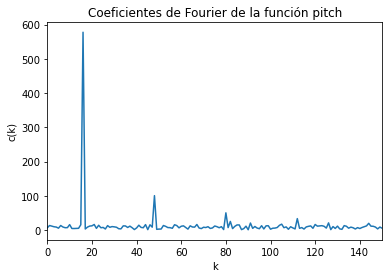

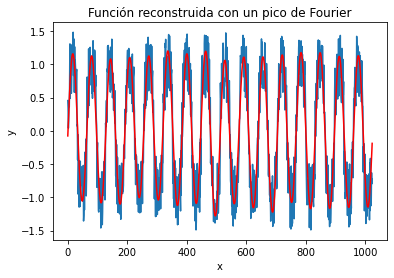

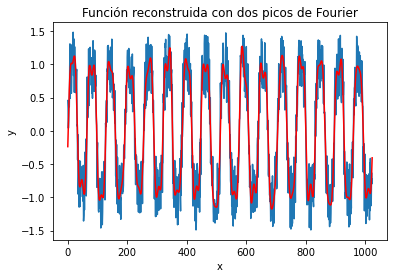

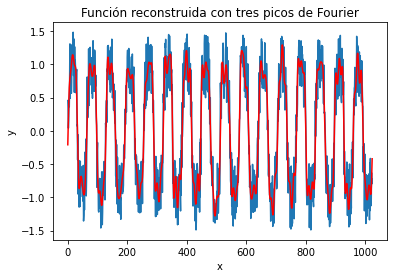

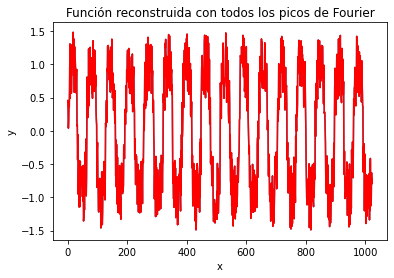

In [9]:
from numpy import arange, loadtxt
from numpy.fft import rfft, irfft
from pylab import plot, show, xlim, ylim, title, xlabel, ylabel,legend
#Ejemplo con pitch.txt
datos=loadtxt("pitch.txt") #importo datos 
c=rfft(datos) #obtengo los coeficientes de Fourier
plot(abs(c)) #represento los coeficientes para saber cuál hacer cero
xlim(0,150)
xlabel("k")
ylabel("c(k)")
title("Coeficientes de Fourier de la función pitch")
show()
#Reconstruyo la función con un pico de Fourier
c[20:]=0.0 #hacemos cero todos los coeficientes menos uno
z=irfft(c) #reconstruimos la función con un pico
plot(datos)
plot(z, "r")
title("Función reconstruida con un pico de Fourier")
xlabel("x")
ylabel("y")
show()
#Reconstruyo la función con dos picos de Fourier
c=rfft(datos) #vuelvo a cargar todos los coeficientes
c[60:]=0.0 #hacemos cero todos los coeficientes menos dos
z=irfft(c) #reconstruimos la función con dos picos
plot(datos)
plot(z, "r")
title("Función reconstruida con dos picos de Fourier")
xlabel("x")
ylabel("y")
show()
#Reconstruyo la función con tres picos de Fourier
c=rfft(datos)
c[90:]=0.0 #hacemos cero todos los coeficientes menos tres
z=irfft(c) #reconstruimos la función con tres picos
plot(datos)
plot(z, "r")
title("Función reconstruida con tres picos de Fourier")
xlabel("x")
ylabel("y")
show()
#Reconstruyo la función con todos los picos de Fourier
c=rfft(datos)
z=irfft(c) #reconstruimos la función con todos los picos
plot(datos)
plot(z, "r")
title("Función reconstruida con todos los picos de Fourier")
xlabel("x")
ylabel("y")
show()

En referencia a la función de datos pitch, viendo el espectro se puede concluir que el primer pico es el más significativo de todos y nos dará una buena aproximación de la función, algo que se puede ver en la función reconstruida, que es suave y se adecua a nuestros datos. Cuando vamos cogiendo 2, 3 y todos los picos, la función reconstruida se va pareciendo más a la original pero perdemos la suavidad que hemos ganado cogiendo solo el primer pico, esto se debe a que son datos que tienen mucho ruido.

**Ejercicio 3 : Campo eléctrico de una distribución de cargas.**

Supogamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante. Un método es calcular primero el potencial eléctrico $\phi$ y después calcular el gradiente. Para una carga puntual de carga $q$ en el origen, el potencial eléctrico a una distancia $r$ desde el origen es $\phi = \frac{q}{4 \pi \epsilon_o r}$ y el campo eléctrioc es $E = - \nabla \phi$.

1. Supongamos que tenemos dos cargas de $\pm 1 C$, separadas por $10    cm$. Calcular el potencial eléctrico resultante en un cuadrado plano de $1 m \times 1 m$ rodeando las cargas y que las contiene en su interior. Calcular el potencial en una malla de puntos con espacios de $1 cm$ y representarlo con una gráfica de densidad.

2. Calcular las derivadas parciales del potencial con respecto a $x$ e $y$ y así calcular el campo eléctrico en el plano $xy$. Hacer una visualización del campo con la función `quiver` de `pylab` que toma como argumentos, dos arrays que representan las compontes $E_x$ e $E_y$ del campo eléctrico.

<ipython-input-10-0948198cb527>:12: RuntimeWarning: divide by zero encountered in double_scalars
  return q*(1/(r1(x,y))-1/(r2(x,y)))/(4*pi*epsilon) #defino la expresión del potencial en cada punto debido a ambas cargas


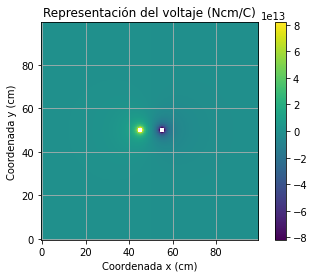

<ipython-input-10-0948198cb527>:40: RuntimeWarning: invalid value encountered in double_scalars
  campoxn[j,i]=campox[j,i]/sqrt(campox[j,i]**2+campoy[j,i]**2) #normalizo el campo en x
<ipython-input-10-0948198cb527>:41: RuntimeWarning: invalid value encountered in double_scalars
  campoyn[j,i]=campoy[j,i]/sqrt(campox[j,i]**2+campoy[j,i]**2) #normalizo el campo en y


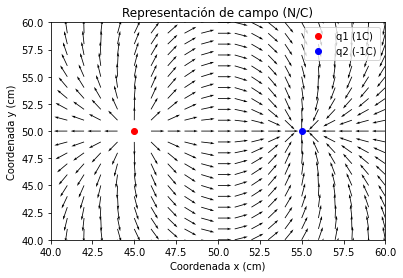

In [10]:
from numpy import linspace, pi, sqrt, zeros, array
from pylab import plot, imshow, show, colorbar, title, xlabel, ylabel, quiver, xlim, grid, ylim,legend
epsilon=8.85e-16 #permitividad en el vacío en unidades de C**2/N·cm**2
q=1 #en Culombios
x01,y01=45,50 #coordenadas iniciales carga 1 (+)
x02,y02=55,50 #coordenadas iniciales carga 2 (-)
def r1(x,y):
    return sqrt((x-x01)**2+(y-y01)**2) #distancia al punto (x,y) de la carga 1
def r2(x,y):
    return sqrt((x-x02)**2+(y-y02)**2) #distancia al punto (x,y) de la carga 2
def phi(x,y):
    return q*(1/(r1(x,y))-1/(r2(x,y)))/(4*pi*epsilon) #defino la expresión del potencial en cada punto debido a ambas cargas
m1=zeros([100,100], float) #malla de 1mx1m
for i in range(len(m1)): 
    for j in range(len(m1)):
        m1[j,i]=phi(i,j) #evaluo el potencial en todas las x e y de 0 a 100 y meto el valor en una matriz
imshow(m1, origin="left") #represento el potencial
colorbar()
title("Representación del voltaje (Ncm/C)")
xlabel("Coordenada x (cm)")
ylabel("Coordenada y (cm)")
grid()
show()
#segundo apartado
a,b=0,100 #dimensiones del plano
N=100
h=1e-8
campox=zeros([100,100],float) #malla de 1mx1m para el campo x sin normalizar
campoy=zeros([100,100],float) #análogo para campo y 
campoxn=zeros([100,100],float) #malla de 1mx1m para el campo x normalizado
campoyn=zeros([100,100],float) #análogo para campo y 
def derivadax(x,y):
    return -(phi(x+0.5*h,y)-phi(x-0.5*h,y))/h #definición de derivada en x
def derivaday(x,y):
    return -(phi(x,y+0.5*h)-phi(x,y-0.5*h))/h #definición de derivada en y
for i in range(len(campox)):
    for j in range(len(campox)):
        campox[j,i]=derivadax(i,j) #para cada valor de i, j hallo el campo en x
        campoy[j,i]=derivaday(i,j) #para cada valor de i, j hallo el campo en y
        campoxn[j,i]=campox[j,i]/sqrt(campox[j,i]**2+campoy[j,i]**2) #normalizo el campo en x
        campoyn[j,i]=campoy[j,i]/sqrt(campox[j,i]**2+campoy[j,i]**2) #normalizo el campo en y
quiver(campoxn,campoyn,scale=25) #represento el campo ya normalizado
plot(45,50,'ro',label='q1 (1C)') #pinto la carga positiva
plot(55,50,'bo',label='q2 (-1C)') #pinto la carga negativa 
xlim(40,60) #hacemos 'zoom' para observar que la carga negativa se comporta como sumidero y la positiva como fuente
ylim(40,60)
xlabel("Coordenada x (cm)")
ylabel("Coordenada y (cm)")
title("Representación de campo (N/C)")
legend()
show()

El error que nos da al calcular el potencial es que en varios puntos (x,y) coinciden con las coordenadas en las que están situadas las cargas y se divide entre cero. Esto equivale a decir que en el punto donde se encuentra la carga positiva, el potencial es infinito mientras donde está la carga negativa, el potencial es -infinito. Por otra parte, en el gráfico de la representación del campo, se observa lo esperado, la carga positiva actúa de fuente (salen flechas de ella) y la negativa, de sumidero (entran flechas en ella). 